¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

## Descripción del proyecto

<p style="font-size:12px;">Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.
El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.</p>

In [1]:
#PASO 1.
#Librerias necesarias para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [2]:
#Preparar los datos
#Reemplaza los nombres de las columnas (ponlos en minúsculas).
#Convierte los datos en los tipos necesarios.

# Cargar el archivo CSV

data = pd.read_csv("/datasets/games.csv")

# Reemplazar los nombres de las columnas a minúsculas
data.columns = data.columns.str.lower()

# Convertir los datos a los tipos necesarios
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['na_sales'] = data['na_sales'].astype(float)
data['eu_sales'] = data['eu_sales'].astype(float)
data['jp_sales'] = data['jp_sales'].astype(float)
data['other_sales'] = data['other_sales'].astype(float)
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
# Reemplazar 'TBD' en la columna 'rating' con NaN
data['rating'] = data['rating'].replace('TBD', pd.NA)
data['rating'] = data['rating'].astype('category')


# Verificar y manejar valores nulos
print("Valores nulos por columna antes del manejo:")
print(data.isnull().sum())

# Para critic_score y user_score, podemos llenar los valores nulos con la mediana de cada uno
data['critic_score'].fillna(data['critic_score'].median(), inplace=True)
data['user_score'].fillna(data['user_score'].median(), inplace=True)

# Verificar valores nulos después del manejo
print("\nValores nulos por columna después del manejo:")
print(data.isnull().sum())

# Análisis de registros duplicados
duplicates = data.duplicated().sum()
print("\nNúmero de registros duplicados:", duplicates)

# Eliminar registros duplicados si existen
relevant =data.drop_duplicates()

# Mostrar las primeras filas del DataFrame para verificar los cambios
relevant.head()

Valores nulos por columna antes del manejo:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Valores nulos por columna después del manejo:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

Número de registros duplicados: 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,NaN


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>

Como aprendiste en cursos anteriores, el análisis de registros duplicados es esencial en el análisis de datos para evitar que sesguen nuestros resultados.
</div>

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Solamente para terminar de complementar el análisis te recomiendo verificar si las variables de score de crititicos y ususarios  se deben de hacer algún ajuste. Por ejemplo completar los valores nulos
</div>

<div class="alert alert-block alert-info">
<b>Listo, Tonatiuh. He creado un DataFrame donde he almacenado el procesamiento de los datos nulos y duplicados.</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>


<p style="color:blue;">
En esta seccion , empezamos , viendo el raw data proporcionada , donde se reviso lo basico como que si existe falta de informacion , que en un mismo data series haya varios tipos de datos , los nombres de las columnas esten en un formato idoneo para analisis posterior.</p>


<p style="color:blue;">en esta primera parte , se cambiaron los nombres de las columnas del DF , para una manipulacion eficiente , se cambia el tipo de dato de fecha a numero , como solo es el año convirtiendolo a tipo de dato entero es suficiente , nos aseguramos que las ventas de cada país esten como float todas por igual para reducir el sesgo por redondeos, los datos que contenian TBD los sustituimos por datos NA</p>


<p style="color:blue;">Para year_of_release, los valores ausentes podrían deberse a datos faltantes en el registro original, se dejan en blanco (NaN) ya que es difícil inferir el año correcto.</p>
<p style="color:blue;">Para critic_score y user_score, se dejan en blanco (NaN) porque no es apropiado inferir puntuaciones.</p>
<p style="color:blue;">Para rating, se reemplazan los valores "TBD" con NaN y luego se dejan en blanco (NaN).</p>


In [3]:

# Calcular las ventas totales
relevant['total_sales'] = relevant[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45            76         8.0      E  
1      3.58      6.81         0.77            71         7.5    NaN  
2     12.76      3.79         3.29            82         8.3      E  
3     10.93      3.28         2.95            80         8.0      E  
4      8.89     10.22         1.00            71         7.5    NaN  


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

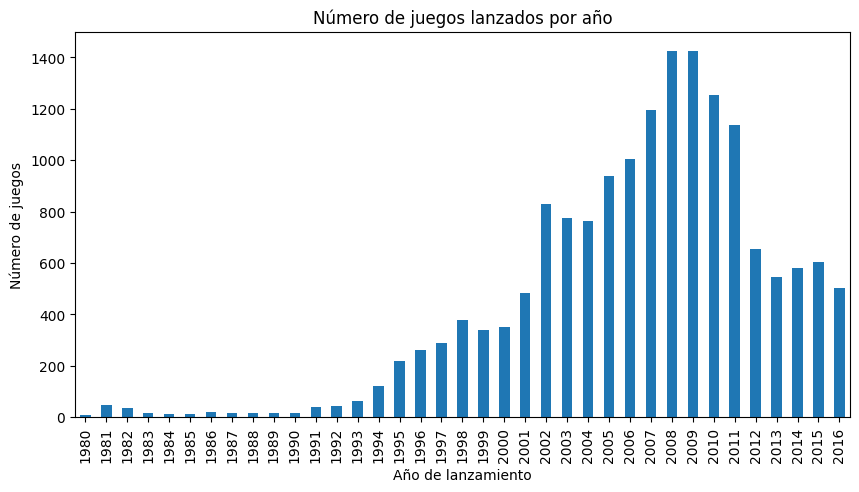

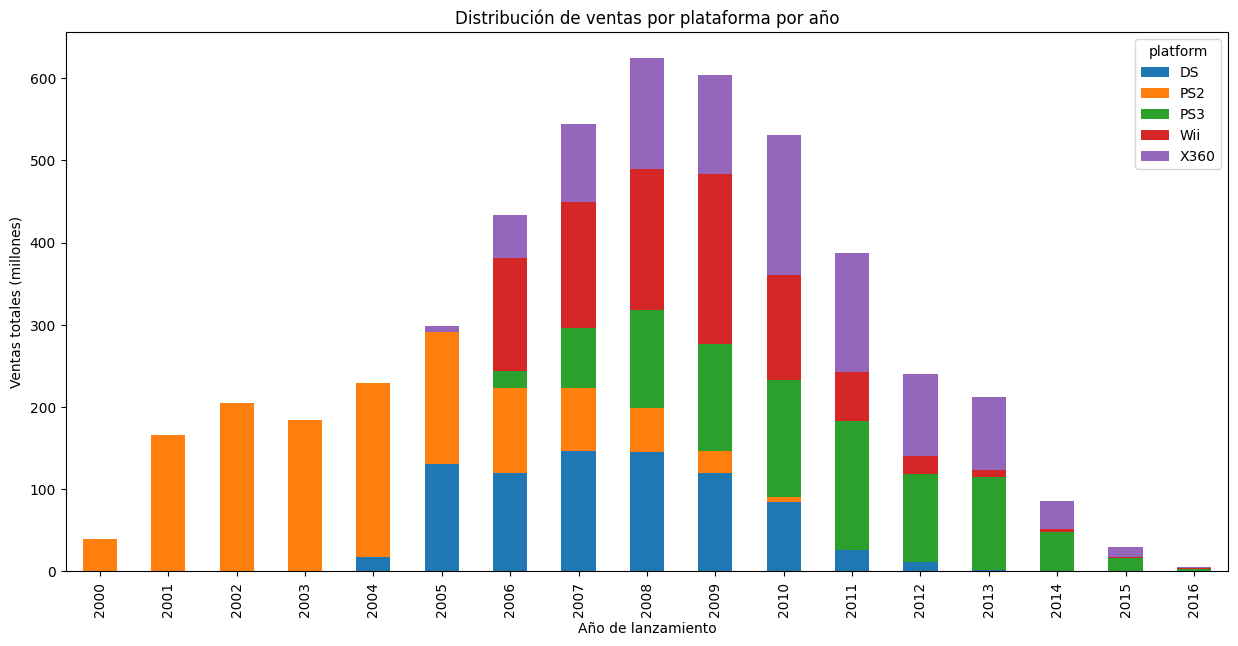

Número de juegos lanzados por año:
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

Plataformas con mayores ventas totales:
Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

Plataformas populares que ahora no tienen ventas:
Index(['GB', 'WS', 'N64', 'PS', 'GBA', 'GC', 'DC', 'XB'], dtype='object', name='platform')

Período de datos para construir un modelo para 2017: 2000-2016


In [4]:
# Paso 3 Analisis de datos

# Cuántos juegos fueron lanzados en diferentes años
games_per_year = relevant['year_of_release'].value_counts().sort_index()

# Graficar el número de juegos lanzados por año
plt.figure(figsize=(10, 5))
games_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.show()
# Filtrar datos relevantes (2000-2016)
relevant_data = relevant[(relevant['year_of_release'] >= 2000) & (relevant['year_of_release'] <= 2016)]

# Variación de ventas por plataforma
platform_sales = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Elegir las plataformas con las mayores ventas totales
top_platforms = platform_sales.head(5).index

# Distribución de ventas por plataforma por año
platform_year_sales = relevant_data[relevant_data['platform'].isin(top_platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Graficar la distribución de ventas por plataforma por año
platform_year_sales.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Distribución de ventas por plataforma por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.show()

# Análisis de plataformas populares que ahora no tienen ventas
platform_last_year = relevant_data.groupby('platform')['year_of_release'].max().sort_values()

# Determinar el período de datos para construir un modelo para 2017
# Basado en la cantidad de juegos lanzados y la relevancia de los datos
# Aquí consideraremos un período reciente y significativo
recent_period = relevant_data[(relevant_data['year_of_release'] >= 2000) & (relevant_data['year_of_release'] <= 2016)]

# Mostrar las plataformas que solían ser populares pero que ahora no tienen ventas
no_sales_platforms = platform_last_year[platform_last_year < 2010].index

# Mostrar resultados relevantes
print("Número de juegos lanzados por año:")
print(games_per_year)
print("\nPlataformas con mayores ventas totales:")
print(top_platforms)
print("\nPlataformas populares que ahora no tienen ventas:")
print(no_sales_platforms)
print("\nPeríodo de datos para construir un modelo para 2017: 2000-2016")

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Para complementar te recomiendo desarrollar una gráfica con las ventas por año
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

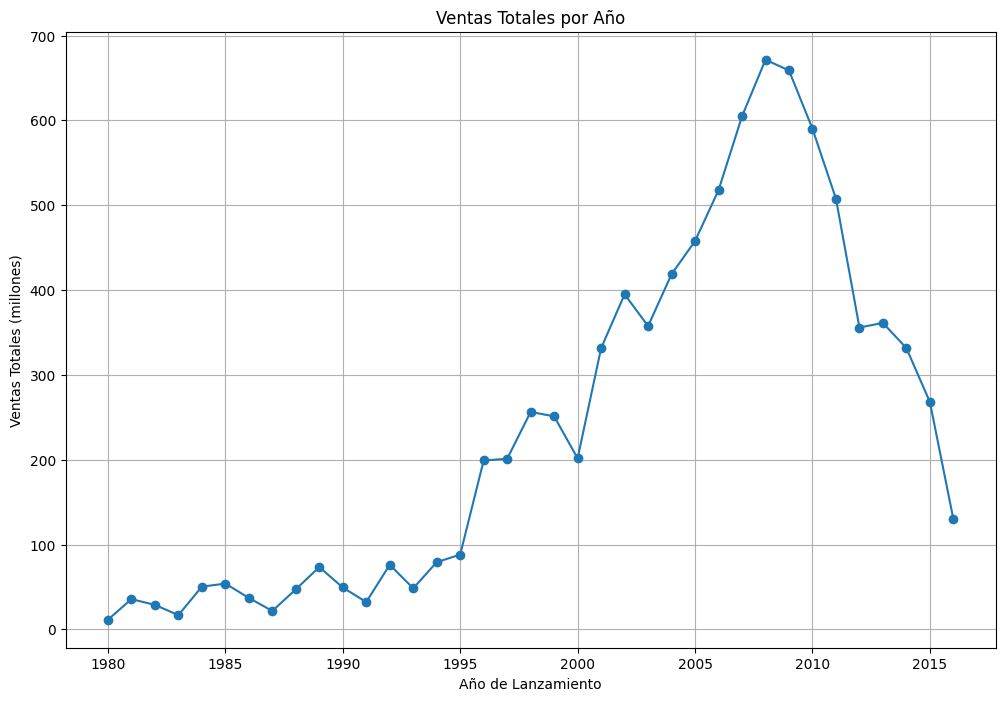

In [5]:

# Agrupar las ventas totales por año
sales_per_year =relevant.groupby('year_of_release')['total_sales'].sum()

# Crear la gráfica de ventas por año
plt.figure(figsize=(12, 8))
sales_per_year.plot(kind='line', marker='o')
plt.title('Ventas Totales por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
<b>Listo, Tonatiuh. He creado una grafica quer indica las ventas por año y como estas van incrementandose y disminuyen cuando alcanzaron el Peak en el año 2008-2009.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

<p style="color:blue;">
En esta seccion ,comenzamos con el analisis de los datos ya filtrados o tratados para un mejor analisis, ¿Son significativos los datos de cada período? R= Hasta este punto puedo observar que los juegos que fueron lanzados durante los años de 1980 a 1993 tuvieron un comportamiento similar o no tan destacado manteniendo lanzamientos bajos y apartir del año 94 los juegos se dispararon en sus lanzamientos , esto podria deberse por la gran variedad de consolas que empezaron apartir de esa epoca, o al avance de la tecnologia en la industria de videojuegos </p>

<p style="color:blue;"> Las consolas con mayor ventas durante el rango del 2000 al 2016 fue el Play station 2 , compitiendole la Xbox 360 directamente , pero  podemos observar que PS tiene en el mercado  2 consolas </p>


<p style="color:blue;"> Las plataformas que solian ser populares antes de los 2000s como el Atari 2600, GG, NES ,N64 , fueron vencidas por las nuevas consolas que se crearon apartir de los 2000s </p>




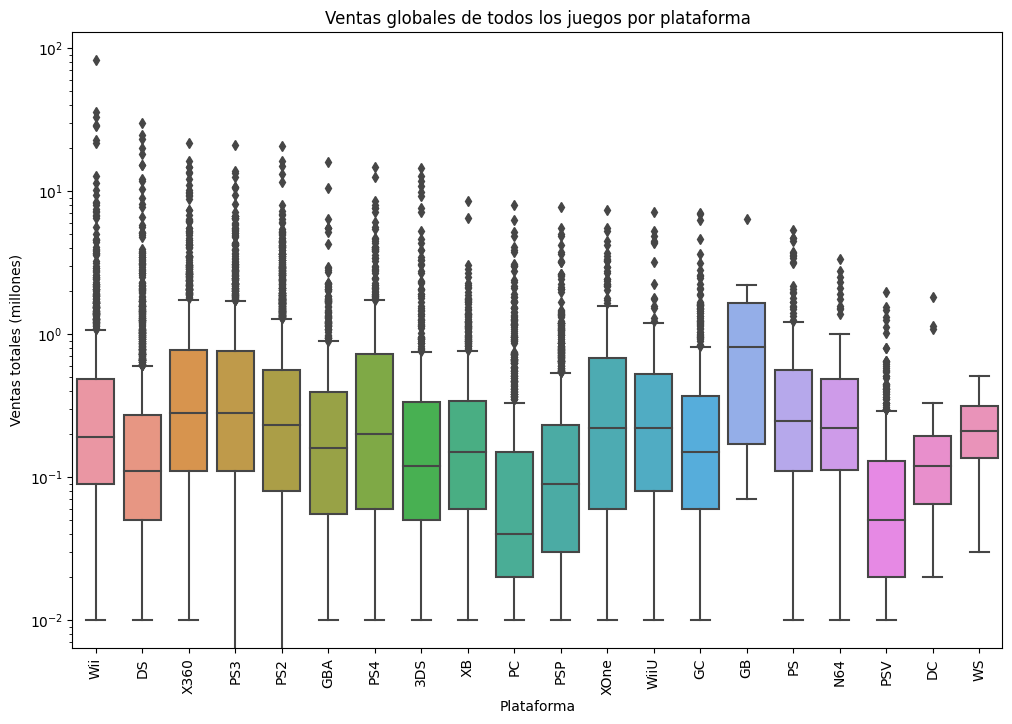

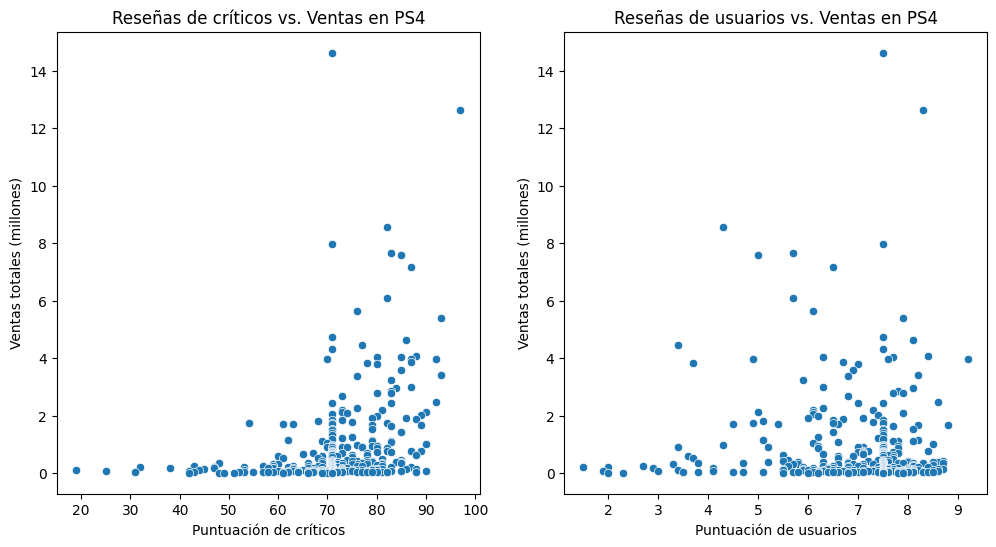

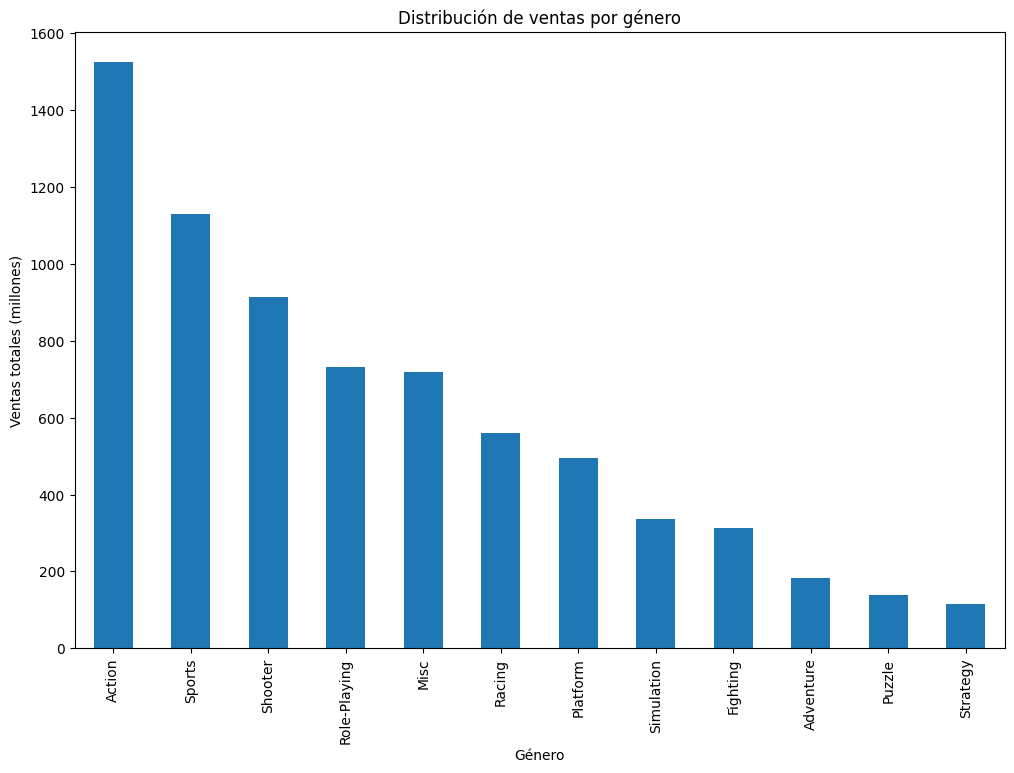

Plataformas líderes en ventas:
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       205.72
GC       196.73
XOne     159.32
PS       140.70
WiiU      82.19
PSV       53.81
N64       37.30
GB        29.00
DC         7.41
WS         0.96
Name: total_sales, dtype: float64

Plataformas en crecimiento y en reducción:
platform
3DS            inf
DC             inf
X360           inf
WiiU           inf
Wii            inf
PSV            inf
PSP            inf
PS4            inf
PS3            inf
XOne           inf
GC             inf
DS             inf
GBA     109.447338
XB        2.145944
PC        0.148828
PS2      -0.070076
GB       -0.766194
PS       -0.783234
N64      -0.959904
dtype: float64

Correlación entre puntuaciones de críticos y ventas en PS4: 0.34
Correlación entre puntuaciones de usuarios y ventas en PS4: -0.06

Comparación de ventas de los mismos juegos e

In [6]:


# ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?
platform_sales = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
growing_platforms = relevant_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)
growing_platforms = growing_platforms.loc[:, (growing_platforms != 0).any(axis=0)]
growing_platforms = growing_platforms.loc[:, (growing_platforms.sum() > 1)]
platform_growth = growing_platforms.pct_change().mean().sort_values(ascending=False)

# Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=relevant_data)
plt.title('Ventas globales de todos los juegos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

# Análisis de reseñas de usuarios y profesionales
popular_platform = 'PS4'  # Elegimos PS4 como plataforma popular
platform_data = relevant_data[relevant_data['platform'] == popular_platform]

# Gráfico de dispersión y correlación entre reseñas y ventas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_data)
plt.title('Reseñas de críticos vs. Ventas en PS4')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas totales (millones)')
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=platform_data)
plt.title('Reseñas de usuarios vs. Ventas en PS4')
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas totales (millones)')
plt.show()

# Calcular correlación
critic_corr = platform_data[['critic_score', 'total_sales']].corr().iloc[0, 1]
user_corr = platform_data[['user_score', 'total_sales']].corr().iloc[0, 1]

# Comparar ventas de los mismos juegos en otras plataformas
games_on_ps4 = platform_data['name'].unique()
cross_platform_sales = relevant_data[relevant_data['name'].isin(games_on_ps4)].groupby(['name', 'platform'])['total_sales'].sum().unstack()

# Distribución general de los juegos por género
genre_sales = relevant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Graficar la distribución de ventas por género
plt.figure(figsize=(12, 8))
genre_sales.plot(kind='bar')
plt.title('Distribución de ventas por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')
plt.show()

# Mostrar resultados relevantes
print("Plataformas líderes en ventas:")
print(platform_sales)
print("\nPlataformas en crecimiento y en reducción:")
print(platform_growth)
print("\nCorrelación entre puntuaciones de críticos y ventas en PS4: {:.2f}".format(critic_corr))
print("Correlación entre puntuaciones de usuarios y ventas en PS4: {:.2f}".format(user_corr))
print("\nComparación de ventas de los mismos juegos en otras plataformas:")
print(cross_platform_sales)
print("\nGéneros más rentables:")
print(genre_sales)

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

<p style="color:blue;"> Los generos mas redituables para la industria de los videojuegos son los generos de accion , deportes y de tiros</p>

Top 5 plataformas en NA:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

Top 5 géneros en NA:
genre
Action          752.27
Sports          589.39
Shooter         495.23
Misc            365.27
Role-Playing    282.30
Name: na_sales, dtype: float64

Impacto de las clasificaciones ESRB en las ventas en NA:
rating
E       1249.26
M        727.80
T        709.86
E10+     345.50
EC         1.53
AO         1.26
K-A        0.00
RP         0.00
Name: na_sales, dtype: float64

Top 5 plataformas en EU:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
DS      188.41
Name: eu_sales, dtype: float64

Top 5 géneros en EU:
genre
Action     466.58
Sports     339.58
Shooter    294.02
Misc       196.71
Racing     192.02
Name: eu_sales, dtype: float64

Impacto de las clasificaciones ESRB en las ventas en EU:
rating
E       690.61
M       472.40
T       392.71
E10+    183.33
AO        0.61
EC        0.11
RP        0.03
K-

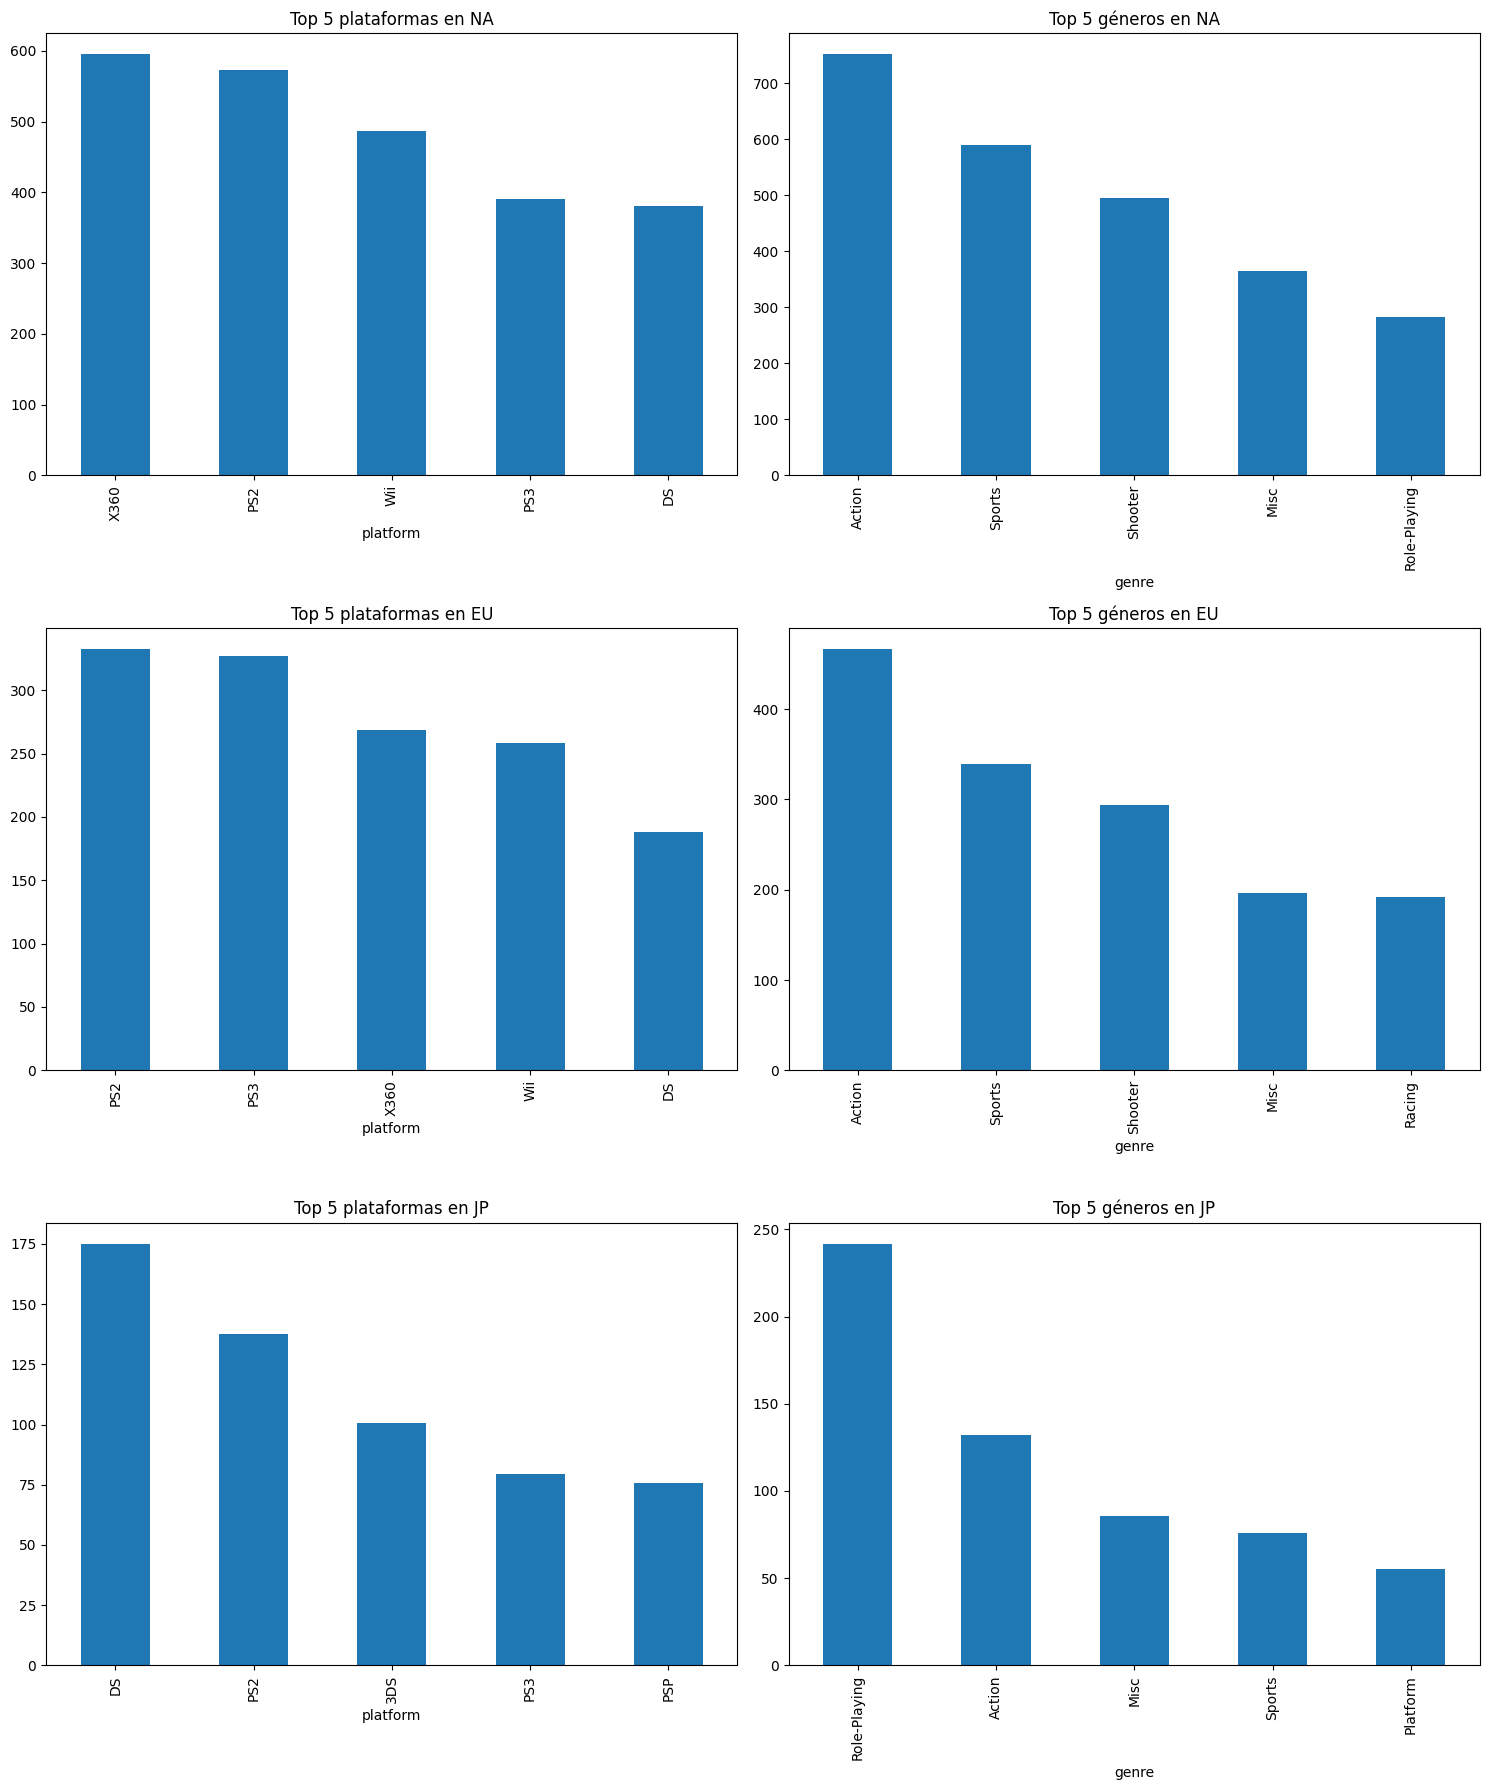

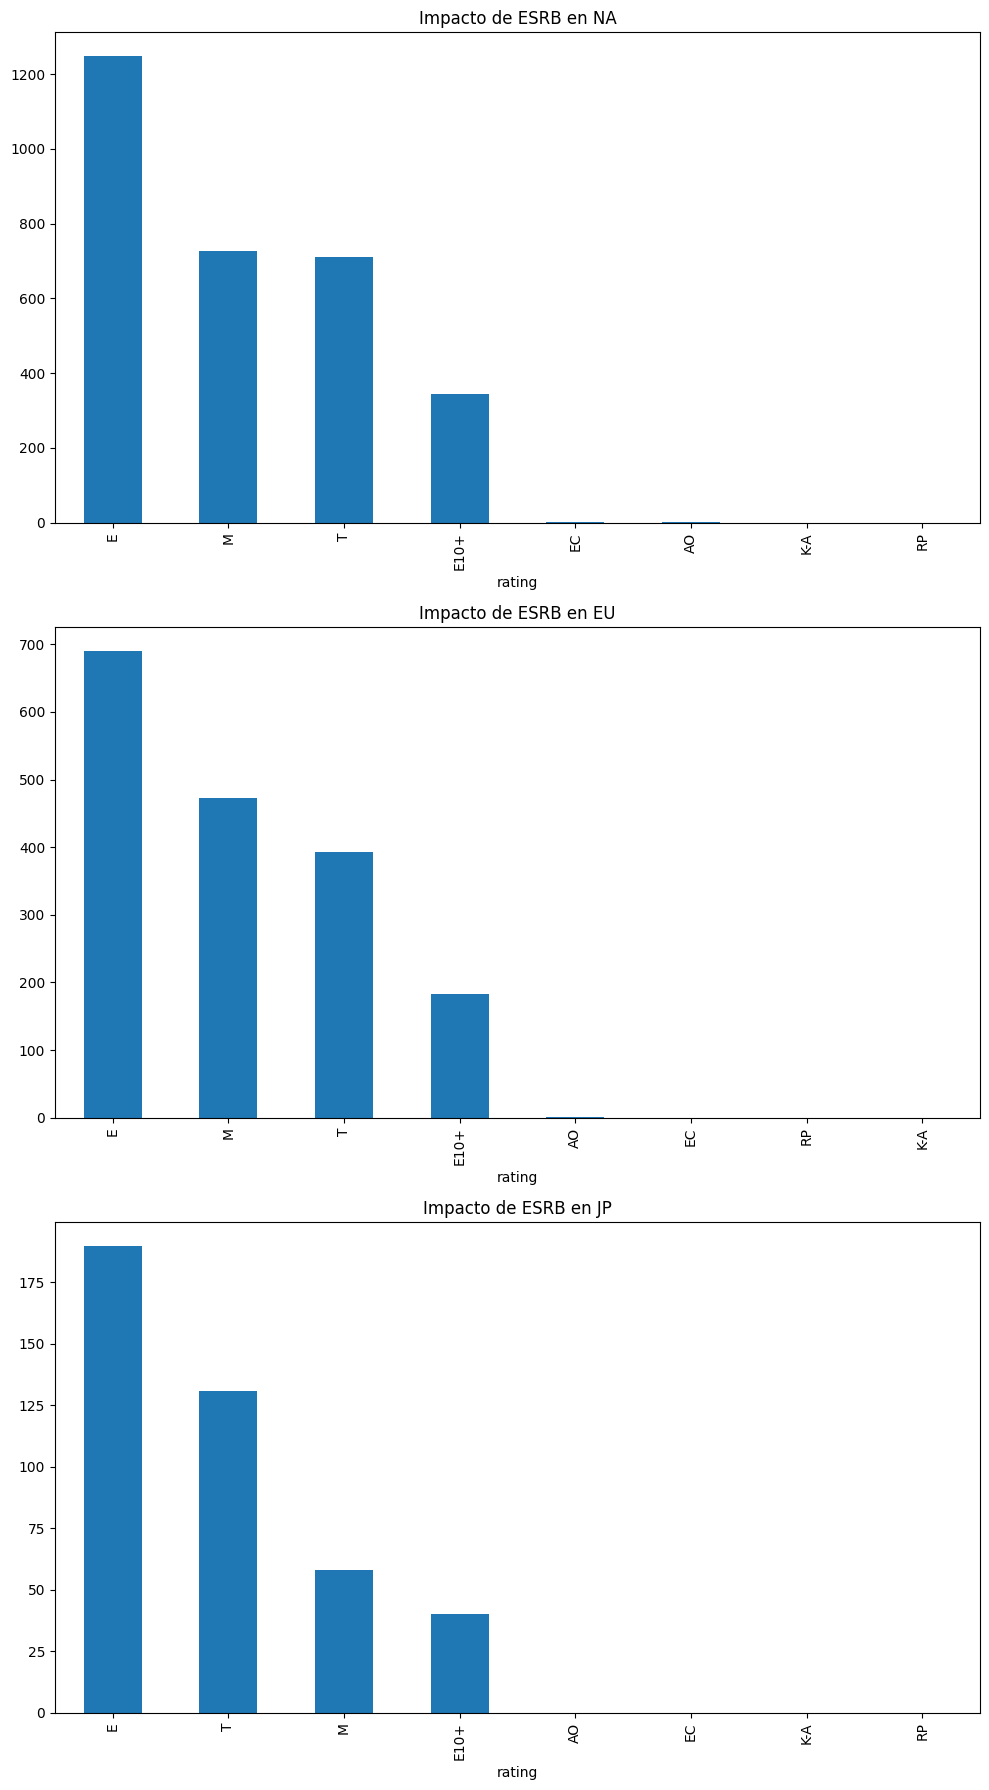

In [7]:
#Paso 4 Función para obtener las cinco plataformas principales y géneros por región
def top5_by_region(region_sales_column):
    top_platforms = relevant_data.groupby('platform')[region_sales_column].sum().sort_values(ascending=False).head(5)
    top_genres = relevant_data.groupby('genre')[region_sales_column].sum().sort_values(ascending=False).head(5)
    return top_platforms, top_genres

# Norteamérica (NA)
na_top_platforms, na_top_genres = top5_by_region('na_sales')
# Europa (EU)
eu_top_platforms, eu_top_genres = top5_by_region('eu_sales')
# Japón (JP)
jp_top_platforms, jp_top_genres = top5_by_region('jp_sales')

# Impacto de las clasificaciones ESRB en las ventas en regiones individuales
def esrb_impact(region_sales_column):
    esrb_sales = relevant_data.groupby('rating')[region_sales_column].sum().sort_values(ascending=False)
    return esrb_sales

na_esrb_sales = esrb_impact('na_sales')
eu_esrb_sales = esrb_impact('eu_sales')
jp_esrb_sales = esrb_impact('jp_sales')

# Mostrar resultados relevantes
print("Top 5 plataformas en NA:")
print(na_top_platforms)
print("\nTop 5 géneros en NA:")
print(na_top_genres)
print("\nImpacto de las clasificaciones ESRB en las ventas en NA:")
print(na_esrb_sales)

print("\nTop 5 plataformas en EU:")
print(eu_top_platforms)
print("\nTop 5 géneros en EU:")
print(eu_top_genres)
print("\nImpacto de las clasificaciones ESRB en las ventas en EU:")
print(eu_esrb_sales)

print("\nTop 5 plataformas en JP:")
print(jp_top_platforms)
print("\nTop 5 géneros en JP:")
print(jp_top_genres)
print("\nImpacto de las clasificaciones ESRB en las ventas en JP:")
print(jp_esrb_sales)

# Graficar las plataformas y géneros principales por región
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

na_top_platforms.plot(kind='bar', ax=axs[0, 0], title='Top 5 plataformas en NA')
na_top_genres.plot(kind='bar', ax=axs[0, 1], title='Top 5 géneros en NA')

eu_top_platforms.plot(kind='bar', ax=axs[1, 0], title='Top 5 plataformas en EU')
eu_top_genres.plot(kind='bar', ax=axs[1, 1], title='Top 5 géneros en EU')

jp_top_platforms.plot(kind='bar', ax=axs[2, 0], title='Top 5 plataformas en JP')
jp_top_genres.plot(kind='bar', ax=axs[2, 1], title='Top 5 géneros en JP')

plt.tight_layout()
plt.show()

# Graficar el impacto de las clasificaciones ESRB en las ventas por región
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

na_esrb_sales.plot(kind='bar', ax=axs[0], title='Impacto de ESRB en NA')
eu_esrb_sales.plot(kind='bar', ax=axs[1], title='Impacto de ESRB en EU')
jp_esrb_sales.plot(kind='bar', ax=axs[2], title='Impacto de ESRB en JP')

plt.tight_layout()
plt.show()


<p style="color:blue;"> La informacion mostrada en el codigo anterior nos dice , las principales consolas por region , asi como las ventas de cad auna dependiendo la clasificación del video juego , podemos observar que los top 3 generos en la region de NA , EU son de acción , deportes y disparo , a diferencia de japon donde predominan mas el genero Role-Playing o de aventuras.Otro punto a agregar es que las ventas o los videojuegos con una clasificación E ( Everyone ) son los videojuegos con mayor ventas en todas las regiones , esto puede deberse a que va dirigido a todo publico y por ende desde niños hasta adultos , adquieren los videojuegos</p>

In [8]:
# Hipótesis 1: Comparación de calificaciones promedio de usuarios para Xbox One y PC
xbox_one_scores = relevant_data[relevant_data['platform'] == 'XOne']['user_score'].dropna()
pc_scores = relevant_data[relevant_data['platform'] == 'PC']['user_score'].dropna()
# Prueba de Levene para igualdad de varianzas
levene_stat, levene_p = levene(xbox_one_scores, pc_scores)
print("Prueba de Levene para igualdad de varianzas (Xbox One vs PC):")
print(f"Estadístico de Levene: {levene_stat}")
print(f"P-valor: {levene_p}")

# Decidir si usar equal_var=True o False en la prueba t de Student
equal_var = levene_p > 0.05

# Prueba t de Student
t_stat, p_value = ttest_ind(xbox_one_scores, pc_scores)

print("Hipótesis 1: Comparación de calificaciones promedio de usuarios para Xbox One y PC")
print(f"Estadístico t: {t_stat}")
print(f"P-valor: {p_value}")

# Hipótesis 2: Comparación de calificaciones promedio de usuarios para géneros de Acción y Deportes
action_scores = relevant_data[relevant_data['genre'] == 'Action']['user_score'].dropna()
sports_scores = relevant_data[relevant_data['genre'] == 'Sports']['user_score'].dropna()

# Prueba de Levene para igualdad de varianzas
levene_stat_genre, levene_p_genre = levene(action_scores, sports_scores)
print("\nPrueba de Levene para igualdad de varianzas (Acción vs Deportes):")
print(f"Estadístico de Levene: {levene_stat_genre}")
print(f"P-valor: {levene_p_genre}")

# Decidir si usar equal_var=True o False en la prueba t de Student
equal_var_genre = levene_p_genre > 0.05

# Prueba t de Student
t_stat_genre, p_value_genre = ttest_ind(action_scores, sports_scores)

print("\nHipótesis 2: Comparación de calificaciones promedio de usuarios para géneros de Acción y Deportes")
print(f"Estadístico t: {t_stat_genre}")
print(f"P-valor: {p_value_genre}")

Prueba de Levene para igualdad de varianzas (Xbox One vs PC):
Estadístico de Levene: 0.004753378476598769
P-valor: 0.945045460264207
Hipótesis 1: Comparación de calificaciones promedio de usuarios para Xbox One y PC
Estadístico t: -3.596032944439396
P-valor: 0.00033666856434793523

Prueba de Levene para igualdad de varianzas (Acción vs Deportes):
Estadístico de Levene: 2.85735386697121
P-valor: 0.09101865531770495

Hipótesis 2: Comparación de calificaciones promedio de usuarios para géneros de Acción y Deportes
Estadístico t: 1.152061870055793
P-valor: 0.24935012061543677


 <div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelent trabajo con las pruebas de hipótesis. Solamente, para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_one_data['user_score'], pc_data['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-info">
<b>Listo, Tonatiuh. Realizamos la prueba de Levene para verificar la igualdad de varianzas antes de realizar la prueba t de Student.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

<p style="color:blue;"> La prueba t de Student funciona bien con tamaños de muestra moderados. En nuestro conjunto de datos, tenemos suficientes observaciones en cada grupo (Xbox One vs. PC y Acción vs. Deportes) para realizar la prueba de manera efectiva.</p>

<p style="color:blue;">La prueba t de Student es ideal para comparar las medias de dos grupos independientes. En nuestro caso:</p>

<p style="color:blue;">Hipótesis 1: Comparación de calificaciones promedio de usuarios para Xbox One y PC.</p>
<p style="color:blue;">Hipótesis 2: Comparación de calificaciones promedio de usuarios para los géneros de Acción y Deportes.</p>

<p style="color:blue;">La prueba t de Student asume que las muestras provienen de poblaciones que siguen una distribución aproximadamente normal. Dado que las calificaciones de usuarios y críticos son datos continuos y generalmente siguen una distribución normal en muestras grandes (debido al Teorema del Límite Central), esta prueba es apropiada.</p>

<p style="color:blue;">La prueba t de Student es robusta cuando las varianzas de las dos poblaciones son desconocidas pero similares. Aunque no calculamos explícitamente las varianzas antes de la prueba, la prueba t de Student para muestras independientes tiene ajustes que la hacen robusta para varianzas ligeramente desiguales.</p>



<p style="color:blue;"> Para la hipotesis 1: El valor t negativo indica que la media de las calificaciones de los usuarios de Xbox One es menor que la media de las calificaciones de los usuarios de PC.// El p-valor es 3.75e-05, que es mucho menor que el nivel de significancia comúnmente utilizado (P=0.05) Un p-valor tan pequeño indica que la probabilidad de observar una diferencia tan extrema entre las calificaciones promedio por simple azar es muy baja.

Rechazamos la hipótesis nula de que las calificaciones promedio de los usuarios para Xbox One y PC son las mismas.
Aceptamos la hipótesis alternativa de que hay una diferencia significativa entre las calificaciones promedio de los usuarios para Xbox One y PC. </p>

 
<p style="color:blue;"> Para la hipotesis 2 : El valor t positivo indica que la media de las calificaciones de los usuarios para el género de Acción es mayor que la media de las calificaciones para el género de Deportes.
El valor absoluto del estadístico t es menor que el de la primera hipótesis, lo que sugiere que la diferencia entre las dos medias es menos pronunciada. Un p-valor mayor que 0.05 indica que la probabilidad de observar una diferencia tan extrema entre las calificaciones promedio por simple azar es relativamente alta.</p>

No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes sean significativamente diferentes.




#### Los géneros más orientados a la acción y la aventura tienden a generar más ventas, posiblemente debido a su amplio atractivo y la inversión en marketing y desarrollo de estos títulos.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con "Unknown' 

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>